# Surface-based segregation

## Introduction
#todo


In [9]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

from spatial_segregation import surface_dissim



## Aspatial indices
#todo

## Kernels
#todo

## Synthetic data

Testing the measurements using synthetic data gives some idea about the nature of measurement.
O'Sullivan and Wong use synthetic data representing four different scenarios.
We will plot inhabitants using colored squares and the area of interest using a red boundary.


In [1]:
corners = [
    (9.5, 9.5),
    (9.5, 29.5),
    (29.5, 29.5),
    (29.5, 9.5),
    (9.5, 9.5),
]
area_of_interest = Polygon(corners)
x = np.arange(0, 40)
y = np.arange(0, 40)
xx, yy = np.meshgrid(x, y)
points = [Point(x, y) for (x, y) in zip(xx.ravel(), yy.ravel())]
geometry = gpd.GeoSeries(pd.Series(points))


NameError: name 'Polygon' is not defined


i) 1-km checkerboard


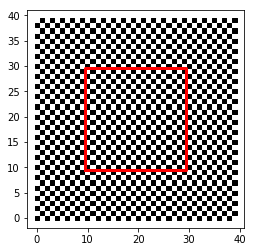

In [97]:
black = [1000 if p.x % 2 == p.y % 2  else 0 for p in geometry]
white = [1000 if p.x % 2 != p.y % 2  else 0 for p in geometry]
df1 = gpd.GeoDataFrame({'geometry': geometry, 'white': white, 'black': black})

df1.plot(column='black', markersize=18, cmap='binary', marker='s')
plt.plot(*area_of_interest.exterior.xy, lw=3, color='red')


ii) 5-km checkerboard


           geometry  white  black
0       POINT (0 0)      0      1
1       POINT (1 0)      0      1
2       POINT (2 0)      0      1
3       POINT (3 0)      0      1
4       POINT (4 0)      0      1
5       POINT (5 0)      1      0
6       POINT (6 0)      1      0
7       POINT (7 0)      1      0
8       POINT (8 0)      1      0
9       POINT (9 0)      1      0
10     POINT (10 0)      0      1
11     POINT (11 0)      0      1
12     POINT (12 0)      0      1
13     POINT (13 0)      0      1
14     POINT (14 0)      0      1
15     POINT (15 0)      1      0
16     POINT (16 0)      1      0
17     POINT (17 0)      1      0
18     POINT (18 0)      1      0
19     POINT (19 0)      1      0
20     POINT (20 0)      0      1
21     POINT (21 0)      0      1
22     POINT (22 0)      0      1
23     POINT (23 0)      0      1
24     POINT (24 0)      0      1
25     POINT (25 0)      1      0
26     POINT (26 0)      1      0
27     POINT (27 0)      1      0
28     POINT (

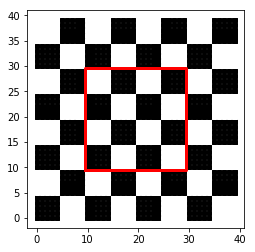

In [105]:
black = [1000 if p.x // 5 % 2 == p.y // 5 % 2  else 0 for p in geometry]
white = [1000 if p.x // 5 % 2 != p.y // 5 % 2  else 0 for p in geometry]
df2 = gpd.GeoDataFrame({'geometry': geometry, 'white': white, 'black': black})

df2.plot(column='black', markersize=18, cmap='binary', marker='s')
plt.plot(*area_of_interest.exterior.xy, lw=3, color='red')


iii) East-west segregated


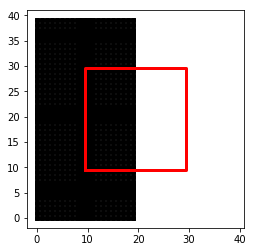

In [78]:

black = [1000 if p.x < 20 else 0 for p in geometry]
white = [1000 if p.x > 20 else 0 for p in geometry]
df3 = gpd.GeoDataFrame({'geometry': geometry, 'white': white, 'black': black})

df3.plot(column='black', markersize=18, cmap='binary', marker='s')
plt.plot(*area_of_interest.exterior.xy, lw=3, color='red')



iv) "Ghetto"


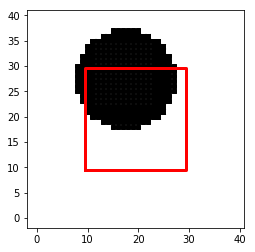

In [80]:

ghetto = Point(17.5, 27.5).buffer(10)
black = [1000 if ghetto.contains(p) else 0 for p in geometry]
white = [1000 if not ghetto.contains(p) else 0 for p in geometry]
df4 = gpd.GeoDataFrame({'geometry': geometry, 'white': white, 'black': black})

df4.plot(column='black', markersize=18, cmap='binary', marker='s')
plt.plot(*area_of_interest.exterior.xy, lw=3, color='red')


In [9]:

for df in df1, df2, df3, df4:
    s, _ = surface_dissim(
        df,
        function='quartic',
        bandwidth=2.5,
        group_1_pop_var='black',
        group_2_pop_var='white',
    )
    print(s)
    

/home/antth/anaconda3/envs/spatial_segregation/lib/python3.7/site-packages/geopandas/geodataframe.py:65: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)
/home/antth/anaconda3/envs/spatial_segregation/lib/python3.7/site-packages/geopandas/geodataframe.py:65: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)
/home/antth/anaconda3/envs/spatial_segregation/lib/python3.7/site-packages/geopandas/geodataframe.py:65: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)
/home/antth/anaconda3/envs/spatial_segregat

0.02553714841397814
0.7235027796350935
0.9922961255158702
0.9676216877936841



Results

|Number |Description          | S (global) | S (area of interest) |
|-------|---------------------|------------|----------------------|
|i      |1-km checkerboard    |            |                 |
|ii     |5-km checkerboard    |            |                 |
|iii    |East-west segregated |            |                 |
|iv     |"Ghetto"             |            |                 |

## References

* O'Sullivan, D. and Wong, D. W. (2007), A Surface‐Based Approach to Measuring Spatial Segregation.
Geographical Analysis, 39: 147-168. doi:10.1111/j.1538-4632.2007.00699.x

